In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn import preprocessing
from torch import nn
import torch
from torch.utils.data import Subset, DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from utils import Utils
utils = Utils()

比较一下究竟哪个部件有用

In [37]:
metric = 'AUCPR'

gyms = {}
gyms['augmentation'] = [None, 'Oversampling', 'SMOTE']

## network architecture ##
gyms['network_architecture'] = ['MLP', 'AE', 'ResNet', 'FTT']
gyms['act_fun'] = ['Tanh', 'ReLU', 'LeakyReLU']

## network fitting ##
gyms['loss_name'] = ['bce', 'focal', 'minus', 'inverse', 'hinge', 'deviation']
gyms['optimizer_name'] = ['SGD', 'Adam', 'RMSprop']
gyms['lr'] = [1e-2, 1e-3]

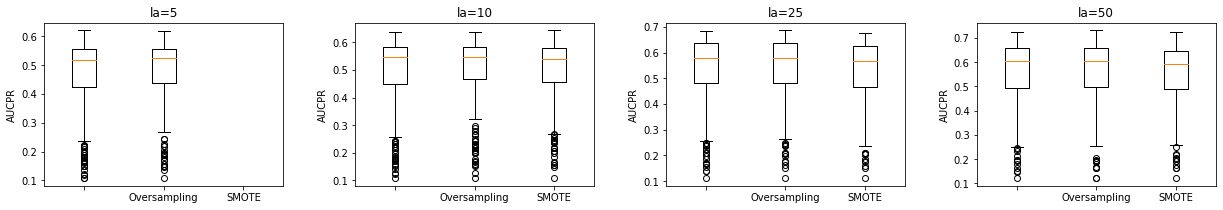

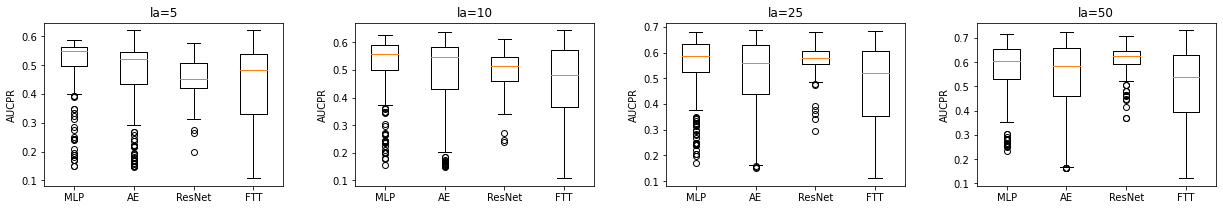

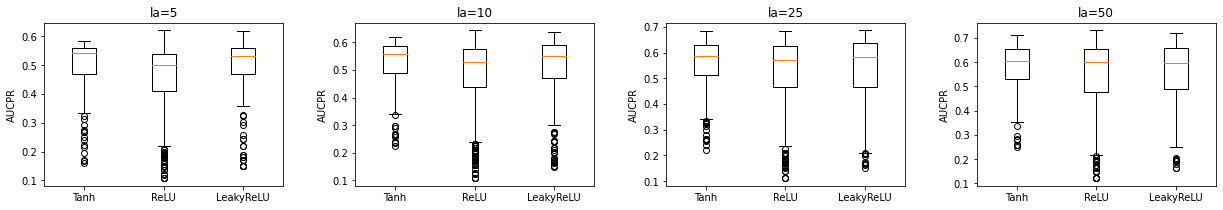

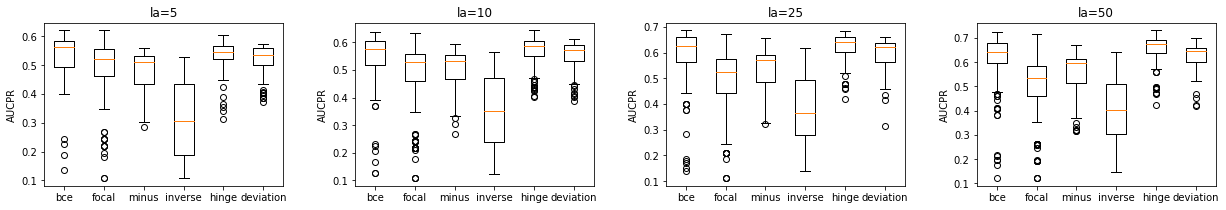

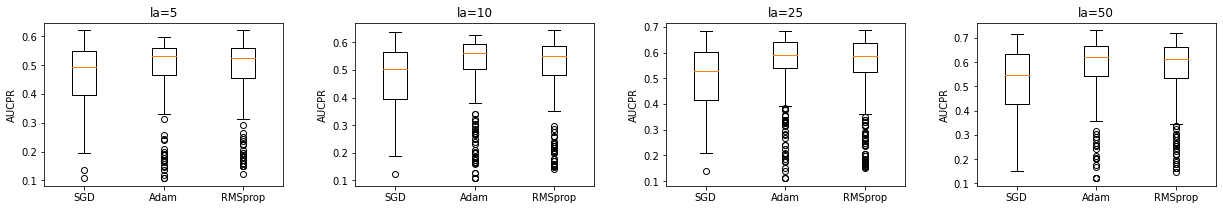

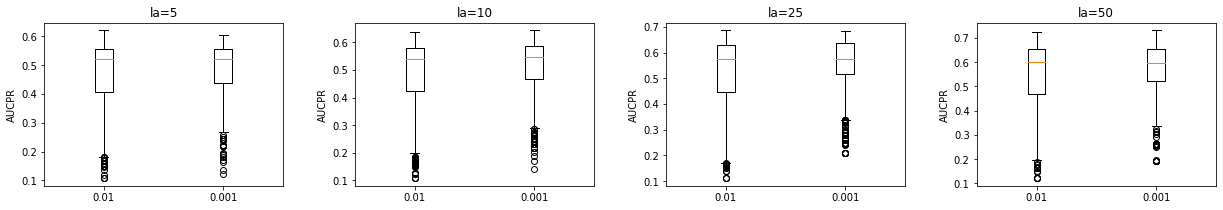

In [42]:
for compared_key, compared_params in gyms.items(): 
    fig, ax = plt.subplots(1, 4, figsize=(21, 3))

    for i, la in enumerate([5, 10, 25, 50]):
        result = pd.read_csv('result/result_' + metric + '_' + str(la) + '_small_1000.csv')
        result.rename(columns={'Unnamed: 0':'Components'}, inplace=True)

        show_values = {}
        for e in compared_params:
            show_values[e] = result.iloc[[i for i, _ in enumerate(result['Components']) if ast.literal_eval(_)[compared_key]==e], 1:].apply(np.mean, axis=1).values
            show_values[e] = [_ for _ in show_values[e] if not np.isnan(_)]

        ax[i].boxplot(show_values.values())
        ax[i].set_xticklabels(show_values.keys())
        # ax.set_xlabel(compared_key)
        ax[i].set_ylabel('AUCPR')
        ax[i].set_title(f'la={la}')
#         ax[i].set_xticklabels(rotation=45)

    plt.subplots_adjust(wspace=0.3)
    plt.show()

In [5]:
# # components = [ast.literal_eval(_) for _ in result['Components'].values]

# # # 需要修改FTT相关的setting
# # for _ in components:
# #     if _['network_architecture'] == 'FTT':
# #         _['hidden_size_list'] = [100, 20]
# #         _['dropout'] = 0.0

# # 需要比较的内容(例如数据增强, loss function等等...)
# compared_key = 'network_architecture'
# compared_key_left = [_ for _ in components[0].keys() if _ != compared_key]

# # group by需要比较的内容
# components_group = []
# for component in set([_[compared_key] for _ in components]):
#     group = [{k:v for k,v in _.items() if k!=compared_key}.values() for _ in components if _[compared_key] == component]
#     group = [tuple(tuple(__) if type(__)==list else __ for __ in _) for _ in group]
#     components_group.append(group)
        
# # 求多个group的intersection
# intersections = list(set.intersection(*[set(_) for _ in components_group]))

# show_values = {}
# for component in set([_[compared_key] for _ in components]):
#     # 补回keys
#     group = [{k: __ if type(__) is not tuple else list(__) for k, __ in zip(compared_key_left, _)} for _ in intersections]
#     # 补回compared key
#     for i in range(len(group)):
#         group[i][compared_key] = component
        
#     # 找出对应结果
#     show_values[component] = result[[ast.literal_eval(_) in group for _ in result['Components'].values]].iloc[:, 1:].apply(np.mean, axis=1).values

In [44]:
2400 / 60

40.0

In [4]:
print(f'原始数据, 模型数&数据集个数: {result.shape}')

result.dropna(axis=1, thresh=int(0.5*(result.shape[0])), inplace=True)
print(f'去除大多数模型(50%以上)fail的数据集后, 模型数&数据集个数: {result.shape}')

columns_select = []
for c in result.columns[1:]:
    result_sub = result[['Components', c]]
    
    if any(result_sub[['FTT' in ast.literal_eval(_).values() for _ in result_sub['Components']]].iloc[:, 1].isnull()):
        continue
    else:
        columns_select.append(c)
        
result = result[['Components'] + columns_select]
print(f'去除FTT fail的几个数据集, 模型数&数据集个数: {result.shape}')

result.dropna(axis=0, how='any',inplace=True)
print(f'去除在有fail情况的components, 模型数&数据集个数: {result.shape}')

result.reset_index(drop=True, inplace=True)

# 去除一列用以测试
ground_truth = result[test_dataset].values
result = result.drop([test_dataset], axis=1)

原始数据, 模型数&数据集个数: (500, 36)
去除大多数模型(50%以上)fail的数据集后, 模型数&数据集个数: (500, 26)
去除FTT fail的几个数据集, 模型数&数据集个数: (500, 19)
去除在有fail情况的components, 模型数&数据集个数: (474, 19)


In [623]:
show_values

{'deviation': array([0.57456191, 0.57528369, 0.57940598, 0.58987901, 0.40472605,
        0.56707867, 0.44575791, 0.44803879, 0.601921  , 0.53180001,
        0.56419926, 0.50499575, 0.58375843, 0.45533788, 0.59478052,
        0.58928641, 0.56232055, 0.56927593, 0.53666895, 0.59066967,
        0.59122115, 0.60060092, 0.59582134, 0.5875505 , 0.55905151,
        0.48193596, 0.56210675, 0.60446317, 0.59090775, 0.59065815,
        0.58823261, 0.5459199 , 0.41263703, 0.54374464, 0.46454694,
        0.59233295, 0.58929504, 0.54062923, 0.56729498, 0.5773929 ,
        0.57067627, 0.41797132, 0.6004916 , 0.50974381, 0.48318211,
        0.57520907, 0.5624241 , 0.53215601, 0.58369831, 0.57125375,
        0.55690245, 0.55299775, 0.50586745, 0.58576394, 0.55915182,
        0.59758396, 0.5868054 , 0.61123902, 0.60031486, 0.56053772,
        0.6020931 , 0.59748547, 0.50552806, 0.57421232, 0.4416158 ,
        0.57673218, 0.56024141, 0.58654395, 0.43141163, 0.54886962,
        0.5515315 , 0.58109785, 0.5

In [5]:
result.columns

Index(['Components', '47_yeast', '20_letter', '6_cardio', '12_fault',
       '7_Cardiotocography', '25_musk', '38_thyroid', '35_SpamBase', '44_Wilt',
       '26_optdigits', '27_PageBlocks', '19_landsat', '30_satellite',
       '28_pendigits', '2_annthyroid', '1_ALOI', '11_donors'],
      dtype='object')

In [6]:
# 只显示不一样的components
Components_list = [ast.literal_eval(_) for _ in result['Components']]
keys = list(ast.literal_eval(result['Components'][0]).keys())
keys_show = []

for k in keys:
    options = [str(_[k]) for _ in Components_list if _[k] is not None]
    
    if len(set(options)) == 1 or len(options) == 0:
        continue
    else:
        keys_show.append(k)

## 尝试学习一个meta-classifier针对不同数据场景预测network architecture

In [7]:
# 能否学习components? (学习一个简单的classifier)
components_list = []
for c in [ast.literal_eval(_) for _ in result['Components']]:
    components_list.append({k:c[k] for k in keys_show})
components_df = pd.DataFrame(components_list)
components_df = components_df.replace([None], 'None')
components_df_index = components_df.copy()

for col in components_df_index.columns:
    components_df_index[col] = preprocessing.LabelEncoder().fit_transform(components_df_index[col])

In [8]:
components_df_index

,augmentation,network_architecture,act_fun,loss_name,optimizer_name,batch_resample,lr
0,2,0,0,2,0,1,0
1,0,1,1,4,1,0,0
2,1,0,1,0,0,1,0
3,2,1,1,3,2,1,0
4,0,0,1,4,0,0,1
...,...,...,...,...,...,...,...
469,0,0,0,0,0,1,0
470,0,2,1,3,0,1,1
471,0,0,0,3,0,1,0
472,2,2,0,1,0,1,1


In [9]:
# class meta_classifier(nn.Module):
#     def __init__(self, n_col, n_per_col, embedding_dim=3):
#         super(meta_classifier, self).__init__()

#         self.embeddings = nn.ModuleList([nn.Embedding(int(n_per_col[i]), embedding_dim) for i in range(n_col)])
#         self.classifier = nn.Sequential(
#                             nn.Linear(n_col * embedding_dim, 20),
#                             nn.ReLU(),
#                             nn.Linear(20, 1),
#                             nn.Sigmoid())
    
#     def forward(self, X):
#         assert X.size(1) == len(self.embeddings)
        
#         embedding_list = []
#         for i, e in enumerate(self.embeddings):
#             embedding_list.append(e(X[:, i].long()))
        
#         embedding = torch.cat(embedding_list, dim=1)
#         pred = self.classifier(embedding)
        
#         return embedding, pred
    
class meta_classifier(nn.Module):
    def __init__(self, n_col, n_per_col, embedding_dim=3):
        super(meta_classifier, self).__init__()

        self.embeddings = nn.ModuleList([nn.Embedding(int(n_per_col[i]), embedding_dim) for i in range(n_col)])
        self.classifier = nn.Sequential(
                            nn.Linear(200 + n_col * embedding_dim, 20),
                            nn.ReLU(),
                            nn.Linear(20, 1),
                            nn.Sigmoid())
    
    def forward(self, meta_features, components):
        assert components.size(1) == len(self.embeddings)
        
        embedding_list = []
        for i, e in enumerate(self.embeddings):
            embedding_list.append(e(components[:, i].long()))
        
        embedding = torch.cat(embedding_list, dim=1)
        embedding = torch.cat((meta_features, embedding), dim=1)
        pred = self.classifier(embedding)
        
        return embedding, pred

In [10]:
# # 针对全部数据集的平均表现
# X = torch.from_numpy(components_df_index.values).float()
# y = torch.from_numpy(result.iloc[:, 1:].apply(np.mean, axis=1).values).float()

# meta-feature (from metaod) + network architecture embedding
X_meta_features, X_components, y, dataset_idx = [], [], [], []
for i in range(result.shape[0]):
    for j in range(1, result.shape[1]):
        meta_features = np.load('datasets/meta-features/'+'meta-features-'+result.columns[j]+'-'+str(la)+'-'+str(42)+'.npz')
        
        X_meta_features.append(meta_features['data'])
        X_components.append(components_df_index.values[i, :])
        y.append(result.iloc[i, j])
        dataset_idx.append(j)

# fill nan value in meta-features
X_meta_features = pd.DataFrame(np.stack(X_meta_features)).fillna(0).values
# min-max scaling for meta-features
scaler_meta_features = MinMaxScaler().fit(X_meta_features)
X_meta_features = scaler_meta_features.transform(X_meta_features)
# to tensor
X_meta_features = torch.from_numpy(X_meta_features).float()
X_components = torch.from_numpy(np.stack(X_components)).float()
y = torch.from_numpy(np.array(y)).float()

In [11]:
print(X_meta_features.shape, X_components.shape)

torch.Size([8058, 200]) torch.Size([8058, 7])


In [209]:
# utils.set_seed(42)
# model = meta_classifier(n_col=X.size(1), n_per_col=[max(X[:, i]).item()+1 for i in range(X.size(1))])
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# train_loader = DataLoader(TensorDataset(X, y), batch_size=6, shuffle=True, drop_last=True)

utils.set_seed(42)
model = meta_classifier(n_col=X_components.size(1), n_per_col=[max(X_components[:, i]).item()+1 for i in range(X_components.size(1))])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_loader = DataLoader(TensorDataset(X_meta_features, X_components, y), batch_size=64, shuffle=True, drop_last=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.90it/s]


Text(0.5, 1.0, 'Training Loss')

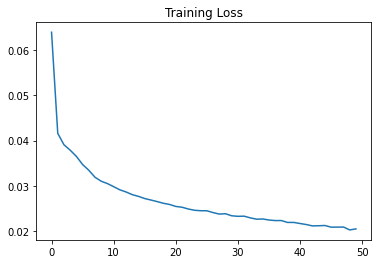

In [210]:
criterion = nn.MSELoss()
epochs = 50

loss_epoch = []
for i in tqdm(range(epochs)):
    loss_batch = []
    for batch in train_loader:
        # batch_X, batch_y = batch
        batch_X_meta_features, batch_X_components, batch_y = batch
        
        # clear grad
        model.zero_grad()
        
        # loss forward
        _, pred = model(batch_X_meta_features, batch_X_components)
        loss = criterion(pred.squeeze(), batch_y)
        
        # loss backward
        loss.backward()
        
        # update
        optimizer.step()
        
        loss_batch.append(loss.item())
    
    loss_epoch.append(np.mean(loss_batch))
        
    # print(f'Epoch: {i}--Loss: {np.mean(loss_batch)}')
    
plt.plot(loss_epoch)
plt.title('Training Loss')

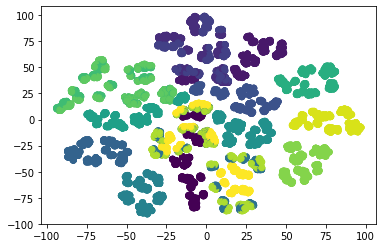

In [211]:
with torch.no_grad():
    embedding, pred = model(X_meta_features, X_components)
embedding_tsne = TSNE(n_components=2, random_state=42).fit_transform(embedding)

# visualization
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=dataset_idx)

In [212]:
X_test_components = components_df_index.values
X_test_components = torch.from_numpy(X_test_components).float()

X_test_meta_features = np.load('datasets/meta-features/'+'meta-features-'+test_dataset+'-'+str(la)+'-'+str(42)+'.npz')
X_test_meta_features = pd.DataFrame(X_test_meta_features['data']).fillna(0).values.squeeze()
X_test_meta_features = np.stack([X_test_meta_features for i in range(X_test_components.size(0))])
X_test_meta_features = scaler_meta_features.transform(X_test_meta_features)
X_test_meta_features = torch.from_numpy(X_test_meta_features).float()

In [213]:
with torch.no_grad():
    _, pred = model(meta_features=X_test_meta_features, components=X_test_components)

print(f'预测的top 5: {ground_truth[torch.topk(pred.squeeze(), 5).indices]}')
print(f'真实的top 5: {torch.topk(torch.tensor(ground_truth), 5).values.numpy()}\n')

print(f'预测的-top 5: {ground_truth[torch.topk(-pred.squeeze(), 5).indices]}')
print(f'真实的-top 5: {ground_truth[torch.topk(torch.tensor(-ground_truth), 5).indices]}')

预测的top 5: [0.35995543 0.03823481 0.02989735 0.06224522 0.4269226 ]
真实的top 5: [0.60016536 0.58804754 0.58627868 0.58594375 0.58466092]

预测的-top 5: [0.35995543 0.03823481 0.02989735 0.06224522 0.4269226 ]
真实的-top 5: [0.01583982 0.01600597 0.01674322 0.01681664 0.01692697]


In [214]:
# plt.figure(figsize=(12, 4))
# plt.bar(np.arange(pred.size(0)), pred.squeeze().numpy() - ground_truth)

## Current SOTA

In [215]:
# Current SOTA model (semi-supervised)
result_SOTA_semi = pd.read_csv('result/' + metric + '_SOTA_semi-supervise.csv')
result_SOTA_semi.rename(columns={'Unnamed: 0':'Params'}, inplace=True)

params = [ast.literal_eval(_) for _ in result_SOTA_semi['Params']]
result_SOTA_semi = result_SOTA_semi[[_[1] != 0.0 for _ in params]]

result_SOTA = pd.DataFrame(data=None, columns=['Components'] + list(result.columns[1:]) + [test_dataset])
result_SOTA['Components'] = result_SOTA_semi.columns[1:]

for i in range(result_SOTA.shape[0]):
    for j in range(1, result_SOTA.shape[1]):
        model = result_SOTA['Components'][i]
        dataset = result_SOTA.columns[j]
        
        aveperform = np.mean(result_SOTA_semi[[ast.literal_eval(_)[0]==dataset for _ in result_SOTA_semi['Params']]][model])
        result_SOTA.iloc[i, j] = aveperform
        
# result_SOTA = pd.concat([result_SOTA['Components'], result_SOTA.iloc[:, 1:].apply(np.mean, axis=1)], axis=1)
# result_SOTA.columns = ['Components', 'AvePerform']
# result_SOTA['AvePerform'] = result_SOTA['AvePerform'] * 100

In [216]:
result_SOTA[['Components', test_dataset]]

,Components,41_Waveform
0,GANomaly,0.107126
1,DeepSAD,0.202735
2,REPEN,0.0575121
3,DevNet,0.247193
4,PReNet,0.245808
5,FEAWAD,0.210441
6,XGBOD,0.207725


## 用无监督聚类的方法看看有没有成pattern的network architecture components

In [70]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2, min_samples=3).fit(embedding)

In [76]:
for c in set(clustering.labels_):
    perform = torch.mean(y[clustering.labels_==c]).item()
    if perform > 0.7:
        print(f'cluster: {c}, number: {y[clustering.labels_==c].size(0)}, perform: {perform}')

cluster: 18, number: 18, perform: 0.7375310063362122
cluster: 19, number: 18, perform: 0.7418796420097351
cluster: 22, number: 18, perform: 0.7347807288169861
cluster: 23, number: 18, perform: 0.742419958114624
cluster: 26, number: 18, perform: 0.7024005055427551
cluster: 27, number: 18, perform: 0.7424874901771545
cluster: 43, number: 18, perform: 0.7168006896972656
cluster: 47, number: 18, perform: 0.7191097736358643
cluster: 49, number: 3, perform: 0.7405858039855957
cluster: 52, number: 3, perform: 0.7229198813438416
cluster: 57, number: 3, perform: 0.7648909687995911
cluster: 65, number: 3, perform: 0.7050041556358337
cluster: 69, number: 3, perform: 0.7842453122138977


In [77]:
for _ in result.Components.iloc[clustering.labels_==57].values:
    print(_)
    print('\n')

{'augmentation': None, 'preprocess': 'minmax', 'network_architecture': 'ResNet', 'layers': 2, 'hidden_size_list': [100, 20], 'act_fun': 'ReLU', 'dropout': 0.0, 'training_strategy': None, 'loss_name': 'minus', 'optimizer_name': 'SGD', 'batch_resample': True, 'epochs': 50, 'batch_size': 256, 'lr': 0.001, 'weight_decay': 0.01}


{'augmentation': 'Oversampling', 'preprocess': 'minmax', 'network_architecture': 'ResNet', 'layers': 2, 'hidden_size_list': [100, 20], 'act_fun': 'ReLU', 'dropout': 0.0, 'training_strategy': None, 'loss_name': 'minus', 'optimizer_name': 'SGD', 'batch_resample': True, 'epochs': 50, 'batch_size': 256, 'lr': 0.001, 'weight_decay': 0.01}


{'augmentation': 'SMOTE', 'preprocess': 'minmax', 'network_architecture': 'ResNet', 'layers': 2, 'hidden_size_list': [100, 20], 'act_fun': 'ReLU', 'dropout': 0.0, 'training_strategy': None, 'loss_name': 'minus', 'optimizer_name': 'SGD', 'batch_resample': True, 'epochs': 50, 'batch_size': 256, 'lr': 0.001, 'weight_decay': 0.01}




KeyboardInterrupt: 

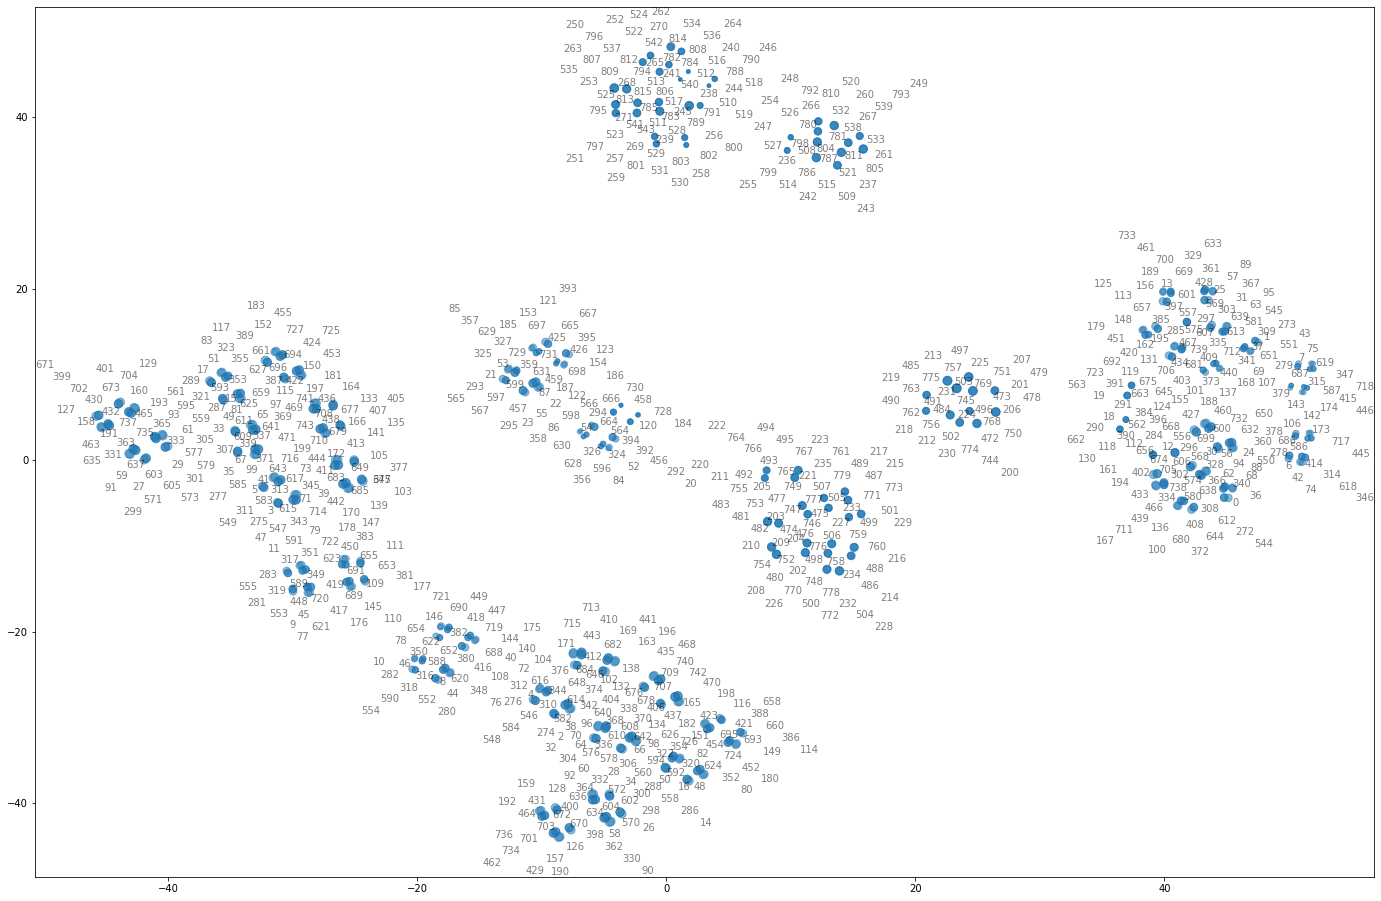

In [30]:
# from adjustText import adjust_text
fig = plt.figure(figsize=(24, 16))
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=y*100, alpha=0.5)
# texts = []
for i, (xx, yy) in enumerate(zip(embedding_tsne[:, 0], embedding_tsne[:, 1])):
#     texts.append(plt.text(xx, yy, i,alpha=0.5))
    plt.text(xx, yy, i,alpha=0.5)
# adjust_text(texts)
# fig.savefig('result.pdf', dpi=300)

## 分析components

In [7]:
# result = pd.concat([result, result_SOTA], axis=0)
# result.reset_index(drop=True, inplace=True)

result = pd.concat([result['Components'], result.iloc[:, 1:].apply(np.mean, axis=1)], axis=1)
result.columns = ['Components', 'AvePerform']
result.sort_values(by=['AvePerform'], ascending=False, inplace=True)
result.reset_index(drop=True, inplace=True)
result['AvePerform'] = result['AvePerform'] * 100

In [8]:
# for i in range(result.shape[0]):
#     print('**********')
#     try:
#         c = ast.literal_eval(result['Components'][i])
#         print({_:c[_] for _ in keys_show})
#     except:
#         print(result['Components'][i])
#     print(f"Performance: {round(result['AvePerform'][i], 4)}")
#     print('**********\n\n')

In [9]:
result_SOTA

,Components,AvePerform
0,GANomaly,26.048442
1,DeepSAD,45.857783
2,REPEN,32.052642
3,DevNet,60.267190
4,PReNet,67.318622
5,FEAWAD,59.775065
6,XGBOD,70.567728


In [11]:
result.shape

(81, 2)

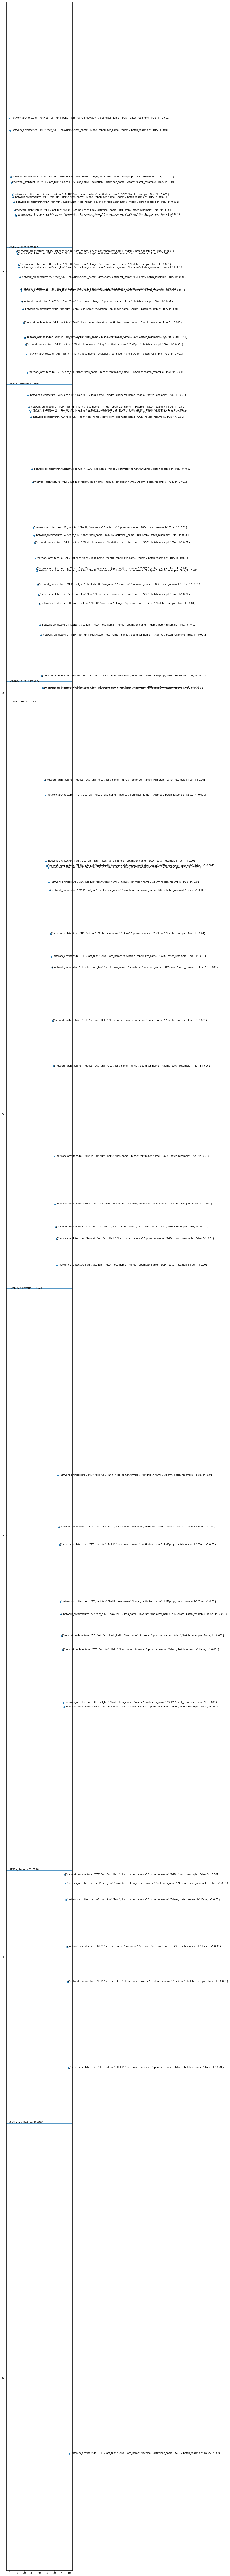

In [10]:
fig = plt.figure(figsize=(5, 200))
x = np.arange(result.shape[0])
y = result['AvePerform']
components = result['Components']

plt.scatter(x, y)
for i, (xx, yy) in enumerate(zip(x, y)):
    c = ast.literal_eval(components[i])
    plt.text(xx, yy, {_:c[_] for _ in keys_show})
    
    
for i in range(result_SOTA.shape[0]):
    plt.axhline(result_SOTA.loc[i, 'AvePerform'])
    plt.text(0, result_SOTA.loc[i, 'AvePerform'], result_SOTA.loc[i, 'Components'] + ', Perform-' + str(round(result_SOTA.loc[i, 'AvePerform'], 4)))
    
fig.savefig('天梯图-'+metric+'.pdf', dpi=300, bbox_inches='tight', pad_inches=0.01)